In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [52]:
botData = pd.read_csv('bot_bidders_info.csv')
humData = pd.read_csv('hum_bidders_info.csv')

In [95]:
botData.head(5)

,bidder_id,number of bids,avg arrival interval,min interval
0,060ac64ff78ae62e9bc697192cebea333760p,194,63665394055,1187134502
1,7505bfc1ca67a5ae14e329b46a88ab869ms9g,798,17059763587,2011695906
2,b1863365ae232a316eb946ba56a29415m0gdz,5329,2551307886,70175438
3,458c8c4e10e5c1b29e3fbe5ee56d46e8y3fb3,1165,11717444384,2783625731
4,6533b670e02ccf583288ba7c8f5fb1carmirt,425,21576961271,222222222


In [105]:
unitIntervalSqRoot = 10000000 #how to choose an interval ??
unitInterval = unitIntervalSqRoot * unitIntervalSqRoot

In [106]:
1 / botData.get('avg arrival interval').dropna().mean() * unitInterval #rate(lambda)

1875.3520400670327

In [107]:
1 / humData.get('avg arrival interval').dropna().mean() * unitInterval

29.45420512473714

In [108]:
botLambda = 1 / botData.get('avg arrival interval').dropna().mean() * unitInterval
humLambda = 1 / humData.get('avg arrival interval').dropna().mean() * unitInterval

In [109]:
botPoisson = np.random.poisson(botLambda, 100000)
humPoisson = np.random.poisson(humLambda, 100000)

(array([  2.13333333e-06,   9.60000000e-06,   4.00000000e-05,
          1.48266667e-04,   4.88533333e-04,   1.29813333e-03,
          2.80213333e-03,   4.69973333e-03,   7.30773333e-03,
          9.01706667e-03,   9.02880000e-03,   7.25706667e-03,
          5.52693333e-03,   3.20000000e-03,   1.56320000e-03,
          6.22933333e-04,   2.35200000e-04,   6.02666667e-05,
          2.02666667e-05,   5.33333333e-06]),
 array([ 1686.  ,  1704.75,  1723.5 ,  1742.25,  1761.  ,  1779.75,
         1798.5 ,  1817.25,  1836.  ,  1854.75,  1873.5 ,  1892.25,
         1911.  ,  1929.75,  1948.5 ,  1967.25,  1986.  ,  2004.75,
         2023.5 ,  2042.25,  2061.  ]),
 <a list of 20 Patch objects>)

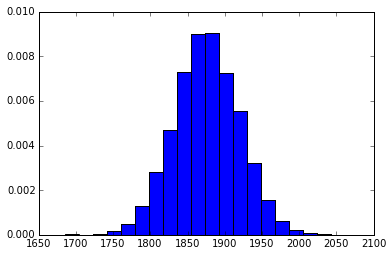

In [110]:
plt.hist(botPoisson, 20, normed=True)

(array([  1.16666667e-04,   4.12500000e-04,   3.46250000e-03,
          7.12916667e-03,   1.61666667e-02,   4.91333333e-02,
          4.90541667e-02,   9.01375000e-02,   5.85750000e-02,
          4.94666667e-02,   5.14458333e-02,   1.95166667e-02,
          1.47208333e-02,   4.23333333e-03,   1.82500000e-03,
          1.07916667e-03,   1.20833333e-04,   5.83333333e-05,
          8.33333333e-06,   4.16666667e-06]),
 array([ 10. ,  12.4,  14.8,  17.2,  19.6,  22. ,  24.4,  26.8,  29.2,
         31.6,  34. ,  36.4,  38.8,  41.2,  43.6,  46. ,  48.4,  50.8,
         53.2,  55.6,  58. ]),
 <a list of 20 Patch objects>)

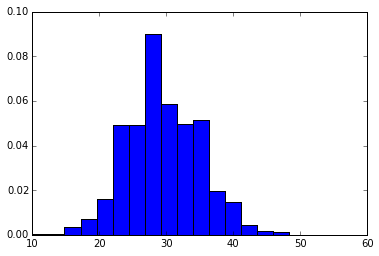

In [111]:
plt.hist(humPoisson, 20, normed=True)

In [112]:
botPoisson

array([1907, 1939, 1910, ..., 1940, 1853, 1984])

In [113]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [114]:
%%R -i botLambda,humLambda,unitIntervalSqRoot #passing variables to R

unitIntervalSqRoot

[1] 10000000


In [115]:
%%R

unitIntervalSqRoot

[1] 10000000


In [116]:
%%R

ppois(botLambda, lambda=botLambda)

[1] 0.5028985


In [117]:
%%R
testDataSet = read.csv( file="test_bidders_info.csv", header=TRUE )

In [118]:
%%R

#head(testDataSet)

NULL


In [119]:
%%R

testVal = 1 / testDataSet[1,3] * unitIntervalSqRoot * unitIntervalSqRoot ##rate(lambda)
testVal

[1] 58.82138


In [120]:
%%R

toString(testDataSet[1,1])

[1] "7d804e4c5a1da2ad391ab5f67a9db4f5jdlj6"


In [121]:
%%R

#get poisson distribution in R

botDistProb = ppois(testVal, lambda=botLambda) - ppois(testVal-1, lambda=botLambda)
humDistProb = ppois(testVal, lambda=humLambda) - ppois(testVal-1, lambda=humLambda)

cat(sprintf("rate: %s\n", testVal))
cat(sprintf("bot poisson dist prob: %s\n", botDistProb))
cat(sprintf("hum poisson dist prob: %s\n", humDistProb))

rate: 58.8213845659599
bot poisson dist prob: 0
hum poisson dist prob: 1.11576687622517e-06


In [122]:
%%R

#get results by comparing poisson probability

resultDF <- data.frame(matrix(ncol=2, nrow=4630))

for (row in 1:nrow(testDataSet)) {
    id = toString(testDataSet[row, 1])
    
    if(is.na(testDataSet[row, 3])) {
        resultDF[row,1] = id
        resultDF[row,2] = 0 #0=human
        next
    }
    
    currInterval = testDataSet[row, 3]
    currRate = 1 / currInterval * unitIntervalSqRoot * unitIntervalSqRoot
    currBotDistProb = as.numeric(ppois(currRate, lambda=botLambda) - ppois(currRate-1, lambda=botLambda))
    currHumDistProb = as.numeric(ppois(currRate, lambda=humLambda) - ppois(currRate-1, lambda=humLambda))
    
    if(currHumDistProb < currBotDistProb) { #it's a bot
        resultDF[row,1] = id
        resultDF[row,2] = 1 #1=bot
    } else {
        resultDF[row,1] = id
        resultDF[row,2] = 0
    }
    #cat(sprintf("%s, %s\n", currBotDistProb, currHumDistProb))
}

In [123]:
%%R

#write results
write.csv(resultDF, file = "test_result_R.csv", row.names = FALSE)

In [124]:
str = "hello"

print str[1:len(str)-1]

ell


In [126]:
#finalize results for submission with python

import csv

#store the results in hash map

fin = open('test_result_R.csv', 'rU')
rdr = csv.reader(fin, delimiter=',')

bidderIdToClass = {} #bidder id => classification (0=human or 1=bot)

for row in rdr:
    bidderId = row[0]
    classification = row[1]
    if bidderId == "X1": #ignore header
        continue
    if bidderIdToClass.has_key(bidderId):
        print("Error !!")
        break
    else:
        bidderIdToClass[bidderId] = classification

fin.close()
        
print(len(bidderIdToClass))

#write to result file
fin = open('sampleSubmission.csv', 'rU')
rdr = csv.reader(fin, delimiter=',')

fout = open('realSubmission.csv', 'wb')
wtr = csv.writer(fout, delimiter=',')

for row in rdr:
    bidderId = row[0]
    if bidderId == "bidder_id":
        wtr.writerow(['bidder_id', 'prediction'])
    elif bidderIdToClass.has_key(bidderId):
        wtr.writerow([bidderId, bidderIdToClass[bidderId]])
    else:
        wtr.writerow([bidderId, 0])
        
fin.close()
fout.close()

4630
